In [1]:

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("Biostrings", version = "3.8")

library(ggplot2)
library(stringr)
library(reshape2)
library(plyr)
#Code to install Biostrings:
#source("http://bioconductor.org/biocLite.R")
#biocLite("Biostrings")
library(Biostrings)
library(scales)

library(knitr)

opts_chunk$set(fig.width=10, fig.height=8,fig.align='center',comment="",echo=FALSE,width=100,warning=FALSE,dev=c("png"))
options(bitmapType='cairo')

opts_knit$set(width=120)

#fix bug in  markdown conversion for plots
plot_hook_markdown=function(x,options){
  sprintf("![](%s)",str_join(x,sep=".",collapse="."))
}
knit_hooks$set(plot=plot_hook_markdown)

plotSetting = theme_bw(base_size = 12, base_family = "Helvetica") + theme(plot.title=element_text(hjust = .5))
data_dir = "."
novaseq_flowcells = c("H23GVDMXX", "H22GHDMXX", "H272GDMXX")
novaseq_lanes = c("1", "2")
alpha = .3

Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.2 (2018-12-20)
Installing package(s) 'Biostrings'
installation path not writeable, unable to update packages: assertthat,
  backports, broom, cli, colorspace, devtools, fs, ggplot2, git2r, gtable,
  highr, openssl, pkgbuild, remotes, rlang, rstudioapi, rvest, SparkR, tinytex,
  usethis, xfun, cluster, MASS, Matrix, mgcv, nlme, rpart, survival
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplic

In [2]:
barcodes = read.table("https://storage.googleapis.com/terra-featured-workspaces/hackathon_2019/read_group_lines.tsv", sep="\t", header=T)

In [9]:
barcodes

RG  ID         SM                            LB                           
1  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392772             
2  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392773             
3  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392774             
4  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392775             
5  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392776             
6  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392777             
7  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392778             
8  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392779             
9  @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392780             
10 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392781             
11 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392782             
12 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392783             
13 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392784             
14 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392785             
15 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392786             
16 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392787             
17 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392788             
18 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392789             
19 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392790             
20 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392791             
21 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392792             
22 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392793             
23 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392794             
24 @RG ID:HFWTV.7 SM:NA12878                    LB:Solexa-392795             
25 @RG ID:H23GV.1 SM:Illumina_P5-Boleh_P7-Yoboh LB:Illumina_P5-Boleh_P7-Yoboh
26 @RG ID:H23GV.1 SM:Illumina_P5-Pojif_P7-Caton LB:Illumina_P5-Pojif_P7-Caton
27 @RG ID:H23GV.1 SM:Illumina_P5-Lolip_P7-Diyen LB:Illumina_P5-Lolip_P7-Diyen
28 @RG ID:H23GV.1 SM:Illumina_P5-Nawoh_P7-Layet LB:Illumina_P5-Nawoh_P7-Layet
29 @RG ID:H23GV.1 SM:Illumina_P5-Jaxah_P7-Nekoy LB:Illumina_P5-Jaxah_P7-Nekoy
30 @RG ID:H23GV.1 SM:Illumina_P5-Xepaw_P7-Kewot LB:Illumina_P5-Xepaw_P7-Kewot
⋮  ⋮   ⋮          ⋮                             ⋮                            
43 @RG ID:H23GV.1 SM:Illumina_P5-Kahiz_P7-Yobex LB:Illumina_P5-Kahiz_P7-Yobex
44 @RG ID:H23GV.1 SM:Illumina_P5-Depob_P7-Defin LB:Illumina_P5-Depob_P7-Defin
45 @RG ID:H23GV.1 SM:Illumina_P5-Halif_P7-Lajar LB:Illumina_P5-Halif_P7-Lajar
46 @RG ID:H23GV.1 SM:Illumina_P5-Yewow_P7-Cotax LB:Illumina_P5-Yewow_P7-Cotax
47 @RG ID:H23GV.1 SM:Illumina_P5-Jafey_P7-Zafed LB:Illumina_P5-Jafey_P7-Zafed
48 @RG ID:H23GV.1 SM:Illumina_P5-Wizap_P7-Bebor LB:Illumina_P5-Wizap_P7-Bebor
49 @RG ID:H23GV.2 SM:Illumina_P5-Boleh_P7-Yoboh LB:Illumina_P5-Boleh_P7-Yoboh
50 @RG ID:H23GV.2 SM:Illumina_P5-Pojif_P7-Caton LB:Illumina_P5-Pojif_P7-Caton
51 @RG ID:H23GV.2 SM:Illumina_P5-Lolip_P7-Diyen LB:Illumina_P5-Lolip_P7-Diyen
52 @RG ID:H23GV.2 SM:Illumina_P5-Nawoh_P7-Layet LB:Illumina_P5-Nawoh_P7-Layet
53 @RG ID:H23GV.2 SM:Illumina_P5-Jaxah_P7-Nekoy LB:Illumina_P5-Jaxah_P7-Nekoy
54 @RG ID:H23GV.2 SM:Illumina_P5-Xepaw_P7-Kewot LB:Illumina_P5-Xepaw_P7-Kewot
55 @RG ID:H23GV.2 SM:Illumina_P5-Pahaz_P7-Dixih LB:Illumina_P5-Pahaz_P7-Dixih
56 @RG ID:H23GV.2 SM:Illumina_P5-Reboc_P7-Cebey LB:Illumina_P5-Reboc_P7-Cebey
57 @RG ID:H23GV.2 SM:Illumina_P5-Xayol_P7-Pepac LB:Illumina_P5-Xayol_P7-Pepac
58 @RG ID:H23GV.2 SM:Illumina_P5-Hewij_P7-Liyik LB:Illumina_P5-Hewij_P7-Liyik
59 @RG ID:H23GV.2 SM:Illumina_P5-Lonax_P7-Zixof LB:Illumina_P5-Lonax_P7-Zixof
60 @RG ID:H23GV.2 SM:Illumina_P5-Worox_P7-Lacok LB:Illumina_P5-Worox_P7-Lacok
61 @RG ID:H23GV.2 SM:Illumina_P5-Hojor_P7-Narad LB:Illumina_P5-Hojor_P7-Narad
62 @RG ID:H23GV.2 SM:Illu

In [3]:
barcodes$LIBRARY_NAME = gsub("LB:", "", barcodes$LB)
flowcell_lane = str_match(barcodes$ID, "ID:(.{5})\\.(\\d)")
barcodes$FLOWCELL = flowcell_lane[,2]
barcodes$LANE = flowcell_lane[,3]
barcode_p5_p7 = str_match(barcodes$PU, "PU:.{15}\\.\\d\\.([ACTG]{8})-([ACTG]{8})")
barcodes$BARCODE_P5 = barcode_p5_p7[,2]
barcodes$BARCODE_P7 = barcode_p5_p7[,3]
barcodes$BARCODE_REVCOMP_P7 = sapply(barcodes$BARCODE_P7, function(x) toString(reverseComplement(DNAString(x))))
barcodes$MACHINE = ifelse(str_detect(barcodes$LIBRARY_NAME, "Solexa"), "HiSeqX", "NovaSeq")
barcodes$FIXED_BARCODE = ifelse(barcodes$MACHINE=="HiSeqX", 
                                paste(barcodes$BARCODE_P5, barcodes$BARCODE_P7, sep="-"), 
                                paste(barcodes$BARCODE_P5, barcodes$BARCODE_REVCOMP_P7, sep="-"))
matched_libraries = recast(subset(barcodes[,9:16], LANE!=2 & FLOWCELL %in% c("HFWTV", "H23GV")), formula = FIXED_BARCODE ~ MACHINE + variable, id.var=c("FIXED_BARCODE", "MACHINE"))
myvars = names(matched_libraries) %in% c("HiSeqX_LIBRARY_NAME", "NovaSeq_LIBRARY_NAME") 
matched_libraries = matched_libraries[myvars]
barcodes = read.table("https://storage.googleapis.com/terra-featured-workspaces/hackathon_2019/read_group_lines.tsv", sep="\t", header=T)
barcodes$LIBRARY_NAME = gsub("LB:", "", barcodes$LB)
flowcell_lane = str_match(barcodes$ID, "ID:(.{5})\\.(\\d)")
barcodes$FLOWCELL = flowcell_lane[,2]
barcodes$LANE = flowcell_lane[,3]
barcode_p5_p7 = str_match(barcodes$PU, "PU:.{15}\\.\\d\\.([ACTG]{8})-([ACTG]{8})")
barcodes$BARCODE_P5 = barcode_p5_p7[,2]
barcodes$BARCODE_P7 = barcode_p5_p7[,3]
barcodes$BARCODE_REVCOMP_P7 = sapply(barcodes$BARCODE_P7, function(x) toString(reverseComplement(DNAString(x))))
barcodes$MACHINE = ifelse(str_detect(barcodes$LIBRARY_NAME, "Solexa"), "HiSeqX", "NovaSeq")
barcodes$FIXED_BARCODE = ifelse(barcodes$MACHINE=="HiSeqX", 
                                paste(barcodes$BARCODE_P5, barcodes$BARCODE_P7, sep="-"), 
                                paste(barcodes$BARCODE_P5, barcodes$BARCODE_REVCOMP_P7, sep="-"))
matched_libraries = recast(subset(barcodes[,9:16], LANE!=2 & FLOWCELL %in% c("HFWTV", "H23GV")), formula = FIXED_BARCODE ~ MACHINE + variable, id.var=c("FIXED_BARCODE", "MACHINE"))
myvars = names(matched_libraries) %in% c("HiSeqX_LIBRARY_NAME", "NovaSeq_LIBRARY_NAME") 
matched_libraries = matched_libraries[myvars]

In [4]:
readData = function(file_type) {
  files=dir(data_dir, pattern=file_type, full.names = T)
  df = ldply(files, readMetricsFile, nrows=-1)
  df$Q_SCORE = -10*log10(df$ERROR_BASES/df$TOTAL_BASES)
  df$Q_SCORE = ifelse(df$Q_SCORE > 100, NA, df$Q_SCORE)
  df$SEQUENCER = ifelse(grepl("HiSeqX", df$FILE), "HiSeqX", "NovaSeq")
  df$SEQUENCER = as.character(df$SEQUENCER)
  df$LIBRARY = ifelse(df$SEQUENCER == "HiSeqX",
                      str_extract(df$FILE, "Solexa-\\d{6}"),
                      str_extract(df$FILE, "Illumina_P5-.{5}_P7-.{5}"))
  df$LIBRARY = as.character(df$LIBRARY)
  df$FLOWCELL = ifelse(df$SEQUENCER == "HiSeqX",
                       "HFWTVMXX",
                       str_extract(df$FILE, "H2.{3}DMXX"))
  df$LANE = ifelse(df$SEQUENCER == "HiSeqX",
                   "7",
                   str_match(df$FILE, "\\.([12])\\.")[,2])
  
  df = merge(df, matched_libraries, by.x=c("LIBRARY"), by.y=c("NovaSeq_LIBRARY_NAME"), all.x=T)
  df$HiSeqX_LIBRARY_NAME[is.na(df$HiSeqX_LIBRARY_NAME)] = as.character(df$LIBRARY[is.na(df$HiSeqX_LIBRARY_NAME)])
  df.merged = unique(df[,c("HiSeqX_LIBRARY_NAME", "COVARIATE")])
  for(flowcell in novaseq_flowcells){
    for(lane in novaseq_lanes){
      tmp = merge(subset(df, SEQUENCER=="HiSeqX"), subset(df, SEQUENCER=="NovaSeq" & FLOWCELL==flowcell & LANE==lane), 
                        by=c("HiSeqX_LIBRARY_NAME", "COVARIATE"), suffixes = c(".HiSeqX", paste(".NovaSeq", flowcell, lane, sep=".")))
      df.merged = merge(df.merged, tmp[,c("HiSeqX_LIBRARY_NAME", "COVARIATE", 
                                          paste("Q_SCORE", "NovaSeq", flowcell, lane, sep="."), "Q_SCORE.HiSeqX",
                                          paste("TOTAL_BASES", "NovaSeq", flowcell, lane, sep="."), "TOTAL_BASES.HiSeqX")])
    }
  }
  return(df.merged)
}

In [5]:
dir("./", pattern=".*chr20*.\\.error_by_cycle", full.names = T)

character(0)

In [6]:
readAndPlotError = function(file_type, title_string){
  df.merged = readData(file_type)
  plots = list()
  i = 1
  for(flowcell in novaseq_flowcells){
    for(lane in novaseq_lanes){
      nova_suffix = paste(flowcell, lane, sep=".")
      plots[[i]] = ggplot(df.merged, aes_string(x="Q_SCORE.HiSeqX", y=paste("Q_SCORE.NovaSeq", nova_suffix, sep="."))) + 
                    geom_abline(slope = 1, intercept = 0, color="grey") + plotSetting + facet_wrap(~COVARIATE) + 
                    geom_point(aes_string(size=paste("TOTAL_BASES.NovaSeq", nova_suffix, sep=".")), alpha=alpha) + 
                    geom_point(aes_string(size="TOTAL_BASES.HiSeqX"), alpha=alpha) +
                    labs(title=paste(title_string, " Between HiSeqX and Novaseq Flowcell:", flowcell, " Lane:", lane, sep=""), size="TOTAL_BASES")
      i = i + 1
    }
  }
  return(plots)
}


In [7]:
readAndPlotErrorContinuousCovariate = function(file_type, title_string, covariate_string, x_val_for_annotation, y_start, y_end, y_text) {
  df.merged = readData(file_type)
  plots = list()
  i = 1
  for(flowcell in novaseq_flowcells){
    for(lane in novaseq_lanes){
      nova_suffix = paste(flowcell, lane, sep=".")
      plots[[i]] = ggplot(df.merged, aes_string(x="COVARIATE", y=paste(paste("Q_SCORE.NovaSeq", nova_suffix, sep="."), "-Q_SCORE.HiSeqX", sep=""), 
                                        color=paste("Q_SCORE.NovaSeq", nova_suffix, sep="."))) + 
                  geom_hline(yintercept = 0, color="grey") + 
                  geom_point(aes_string(size=paste("TOTAL_BASES.NovaSeq", nova_suffix, sep=".")), alpha=alpha) +
                  geom_point(aes_string(size="TOTAL_BASES.HiSeqX"), alpha=alpha) + plotSetting +
                  labs(title=paste(title_string, " Between HiSeqX and Novaseq Flowcell:", flowcell, " Lane:", lane, sep=""), 
                      color="NovaSeq Q_SCORE", x=covariate_string, size="TOTAL_BASES") +
                  annotate("segment", y = y_start, yend = y_end, x = x_val_for_annotation, xend = x_val_for_annotation, arrow=arrow()) +
                annotate("text", y= y_text, x = x_val_for_annotation, label="NovaSeq is\nBetter") +
                annotate("segment", y = y_start*-1, yend = y_end*-1, x = x_val_for_annotation, xend = x_val_for_annotation, arrow=arrow()) +
                annotate("text", y=y_text*-1, x=x_val_for_annotation, label="NovaSeq is\nWorse")
      i = i + 1
    }
  }
  return(plots)
}

In [8]:
readOverlappingData = function(file_type) {
  files = dir(data_dir, pattern=file_type, full.names = T)
  df = ldply(files, readMetricsFile, nrows=-1)
  df$DISAGREES_WITH_MATE_Q = -10*log10(df$DISAGREES_WITH_MATE_COUNT/df$TOTAL_BASES)
  df$DISAGREES_WITH_MATE_Q = ifelse(df$DISAGREES_WITH_MATE_Q>100, NA, df$DISAGREES_WITH_MATE_Q)
  df$DISAGREES_WITH_REFERENCE_Q = -10*log10(df$DISAGREES_WITH_REFERENCE_COUNT/df$TOTAL_BASES)
  df$DISAGREES_WITH_REFERENCE_Q = ifelse(df$DISAGREES_WITH_REFERENCE_Q>100, NA, df$DISAGREES_WITH_REFERENCE_Q)
  df$DISAGREES_WITH_REF_AND_MATE_Q = -10*log10(df$DISAGREES_WITH_REF_AND_MATE_COUNT/df$TOTAL_BASES)
  df$DISAGREES_WITH_REF_AND_MATE_Q = ifelse(df$DISAGREES_WITH_REF_AND_MATE_Q>100, NA, df$DISAGREES_WITH_REF_AND_MATE_Q)
  df$THREE_WAYS_DISAGREEMENT_Q = -10*log10(df$THREE_WAYS_DISAGREEMENT_COUNT/df$TOTAL_BASES)
  df$THREE_WAYS_DISAGREEMENT_Q = ifelse(df$THREE_WAYS_DISAGREEMENT_Q>100, NA, df$THREE_WAYS_DISAGREEMENT_Q)
  df$SEQUENCER = ifelse(grepl("HiSeqX", df$FILE), "HiSeqX", "NovaSeq")
  df$SEQUENCER = as.character(df$SEQUENCER)
  df$LIBRARY = ifelse(df$SEQUENCER == "HiSeqX",
                      str_extract(df$FILE, "Solexa-\\d{6}"),
                      str_extract(df$FILE, "Illumina_P5-.{5}_P7-.{5}"))
  df$LIBRARY = as.character(df$LIBRARY)
  df$FLOWCELL = ifelse(df$SEQUENCER == "HiSeqX",
                       "HFWTVMXX",
                       str_extract(df$FILE, "H2.{3}DMXX"))
  df$LANE = ifelse(df$SEQUENCER == "HiSeqX",
                   "7",
                   str_match(df$FILE, "\\.([12])\\.")[,2])
  
  df = merge(df, matched_libraries, by.x=c("LIBRARY"), by.y=c("NovaSeq_LIBRARY_NAME"), all.x=T)
  df$HiSeqX_LIBRARY_NAME[is.na(df$HiSeqX_LIBRARY_NAME)] = as.character(df$LIBRARY[is.na(df$HiSeqX_LIBRARY_NAME)])
  df.merged = unique(df[,c("HiSeqX_LIBRARY_NAME", "COVARIATE")])
  id.variables = c("LIBRARY", "FILE", "COVARIATE", "SEQUENCER", "FLOWCELL", "LANE", "HiSeqX_LIBRARY_NAME", "TOTAL_BASES")
  for(flowcell in novaseq_flowcells){
    for(lane in novaseq_lanes){
      melted.hiseq = melt(subset(df, SEQUENCER=="HiSeqX"), id.vars=id.variables)
      melted.novaseq = melt(subset(df, SEQUENCER=="NovaSeq" & FLOWCELL==flowcell & LANE==lane), id.vars=id.variables)
      tmp = merge(melted.hiseq, melted.novaseq, 
                  by=c("HiSeqX_LIBRARY_NAME", "COVARIATE", "variable"), suffixes = c(".HiSeqX", paste(".NovaSeq", flowcell, lane, sep=".")))
      df.merged = merge(df.merged, tmp[,c("HiSeqX_LIBRARY_NAME", "COVARIATE", "variable", 
                                          paste("value", "NovaSeq", flowcell, lane, sep="."), "value.HiSeqX",
                                          paste("TOTAL_BASES", "NovaSeq", flowcell, lane, sep="."), "TOTAL_BASES.HiSeqX")])
    }
  }
  return(df.merged)
}

In [9]:
readAndPlotOverlapping = function(file_type, title_string, covariate_string){
  df.merged = readOverlappingData(file_type)
  plots = list()
  i = 1
  for(flowcell in novaseq_flowcells){
    for(lane in novaseq_lanes){
      nova_suffix = paste(flowcell, lane, sep=".")
      plots[[i]] = ggplot(subset(df.merged, variable %in% c("DISAGREES_WITH_MATE_Q", "DISAGREES_WITH_REFERENCE_Q")),
                          aes_string(x="value.HiSeqX", y=paste("value.NovaSeq", nova_suffix, sep="."), color="COVARIATE")) + 
                    geom_point(aes_string(size=paste("TOTAL_BASES.NovaSeq", nova_suffix, sep=".")), alpha=alpha) + 
                    geom_point(aes_string(size="TOTAL_BASES.HiSeqX"), alpha=alpha) + geom_abline(slope = 1, intercept = 0, color="grey") + 
                    plotSetting + facet_wrap(~variable) +
                    labs(title=paste(title_string, " Between HiSeqX and Novaseq Flowcell:", flowcell, " Lane:", lane, sep="", size="TOTAL_BASES"), 
                     color=covariate_string, x="HiSeqX Q_SCORE", y="NovaSeq Q_SCORE")
      i = i + 1
    }
  }
  return(plots)
}

In [10]:
readAndPlotOverlappingCategoricalCovariate = function(file_type, title_string){
  df.merged = readOverlappingData(file_type)
  plots = list()
  i = 1
  for(flowcell in novaseq_flowcells){
    for(lane in novaseq_lanes){
      nova_suffix = paste(flowcell, lane, sep=".")
      plots[[i]] = ggplot(subset(df.merged, variable %in% c("DISAGREES_WITH_MATE_Q", "DISAGREES_WITH_REFERENCE_Q")),
                          aes_string(x="value.HiSeqX", y=paste("value.NovaSeq", nova_suffix, sep="."), color="variable")) + 
                    geom_point(aes_string(size=paste("TOTAL_BASES.NovaSeq", nova_suffix, sep=".")), alpha=alpha) + 
                    geom_point(aes_string(size="TOTAL_BASES.HiSeqX"), alpha=alpha) + 
                    geom_abline(slope = 1, intercept = 0, color="grey") + plotSetting + facet_wrap(~COVARIATE) +
                    labs(title=paste(title_string, " Between HiSeqX and Novaseq Flowcell:", flowcell, " Lane:", lane, sep=""), 
                      x="HiSeqX Q_SCORE", y="NovaSeq Q_SCORE", size="TOTAL_BASES")
      i = i + 1
    }
  }
  return(plots)
}

system("pip install pandoc", intern=TRUE)

system("gsutil cp gs://terra-featured-workspaces/hackathon_2019/HiConf/.*HiConf.*\\.error_by_all .", intern=TRUE)

In [11]:
readPicardHistogramFile = function(file, pattern="", nrows=-1) {
  skip = getLinesToSkipForHist(file)
  name=if(pattern=="")sub("\\.[^.]*$","",file) else sub(pattern=pattern,"",file,fixed=TRUE)
  name=gsub("^.*/","",name)
  data.frame(FILE=name,read.table(file,skip=skip,header=TRUE,sep='\t',nrows=nrows, comment.char = "", quote='', check.names = F))
}

getLinesToSkipForHist = function(metricsFile) {
  startFinder <- scan(metricsFile, what="character", sep="\n", quiet=TRUE, blank.lines.skip=FALSE)
  
  firstBlankLine=0
  
  for (i in 1:length(startFinder)) {
    if (startFinder[i] == "") {
      if (firstBlankLine==0) {
        firstBlankLine=i+1
      } else {
        secondBlankLine=i+1
        break
      }
    }
  }
  
  return(secondBlankLine)
}

readMetricsFile=function(file,skip=6,pattern="",nrows=1){
  name=if(pattern=="")sub("\\.[^.]*$","",file) else sub(pattern=pattern,"",file,fixed=TRUE)
  name=gsub("^.*/","",name)
  data.frame(FILE=name,read.table(file,skip=skip,header=TRUE,stringsAsFactors=FALSE,sep='\t',nrows=nrows))
}

readSelfSMReport = function(file, pattern=""){
  name=if(pattern=="")sub("\\.[^.]*$","",file) else sub(pattern=pattern,"",file,fixed=TRUE)
  data.frame(FILE=name, read.table(file=file, header=T, comment.char=""))
}



readReportFile=function(file,skip=0,pattern="",nrows=-1){
  name=if(pattern=="")sub("\\.[^.]*$","",file) else sub(pattern=pattern,"",file,fixed=TRUE)
  name=gsub("^.*/","",name)
  data.frame(FILE=name,read.table(file,skip=skip,header=TRUE,stringsAsFactors=FALSE,nrows=nrows))
}

In [12]:
readData(".*chr20.*\\.error_by_cycle")

HiSeqX_LIBRARY_NAME COVARIATE Q_SCORE.HiSeqX TOTAL_BASES.HiSeqX
1    Solexa-392772         -1      30.72565       215098            
2    Solexa-392772        -10      30.27965       239965            
3    Solexa-392772       -100      30.23788       272526            
4    Solexa-392772       -101      30.38084       271821            
5    Solexa-392772       -102      30.02653       270648            
6    Solexa-392772       -103      29.08210       268750            
7    Solexa-392772       -104      30.45350       269747            
8    Solexa-392772       -105      29.81024       268029            
9    Solexa-392772       -106      30.61740       268594            
10   Solexa-392772       -107      30.29705       267698            
11   Solexa-392772       -108      30.20412       267271            
12   Solexa-392772       -109      29.65693       266125            
13   Solexa-392772        -11      30.66502       241253            
14   Solexa-392772       -110      30.48422       266072            
15   Solexa-392772       -111      30.39938       265310            
16   Solexa-392772       -112      30.60709       264507            
17   Solexa-392772       -113      30.07960       263791            
18   Solexa-392772       -114      30.13366       262970            
19   Solexa-392772       -115      29.75463       261784            
20   Solexa-392772       -116      30.70903       261370            
21   Solexa-392772       -117      30.23481       261778            
22   Solexa-392772       -118      30.23940       259941            
23   Solexa-392772       -119      30.76978       260276            
24   Solexa-392772        -12      30.27108       240556            
25   Solexa-392772       -120      30.44873       259471            
26   Solexa-392772       -121      29.92093       257273            
27   Solexa-392772       -122      30.11645       257821            
28   Solexa-392772       -123      30.48590       257228            
29   Solexa-392772       -124      31.00063       256858            
30   Solexa-392772       -125      30.12169       257104            
⋮    ⋮                   ⋮         ⋮              ⋮                 
7195 Solexa-392795       72        30.99129       332947            
7196 Solexa-392795       73        31.24765       333200            
7197 Solexa-392795       74        31.05283       332601            
7198 Solexa-392795       75        30.94466       333120            
7199 Solexa-392795       76        30.82843       332794            
7200 Solexa-392795       77        31.30011       333202            
7201 Solexa-392795       78        30.84623       332946            
7202 Solexa-392795       79        30.78972       333439            
7203 Solexa-392795        8        31.08280       315657            
7204 Solexa-392795       80        30.82310       333595            
7205 Solexa-392795       81        31.07824       333271            
7206 Solexa-392795       82        31.36634       332844            
7207 Solexa-392795       83        31.16131       333174            
7208 Solexa-392795       84        31.10908       333064            
7209 Solexa-392795       85        31.04041       332922            
7210 Solexa-392795       86        30.97475       332933            
7211 Solexa-392795       87        31.05728       332942            
7212 Solexa-392795       88        30.74930       332727            
7213 Solexa-392795       89        30.89790       333242            
7214 Solexa-392795        9        31.35551       315619            
7215 Solexa-392795       90        31.07490       333015            
7216 Solexa-392795       91        31.03964       332863            
7217 Solexa-392795       92        31.47477       332832            
7218 Solexa-392795       93        31.08581       332568            
7219 Solexa-392795       94        30.74904       332707            
7220 Solexa-392795       95        31.08415       332441            
722

[1]  


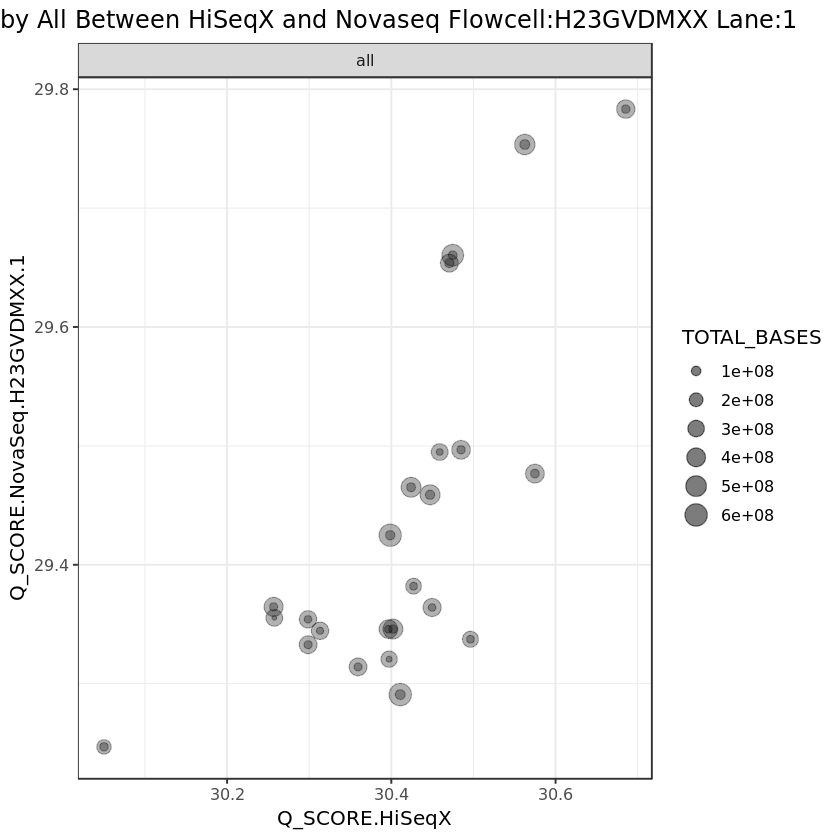

[1]  


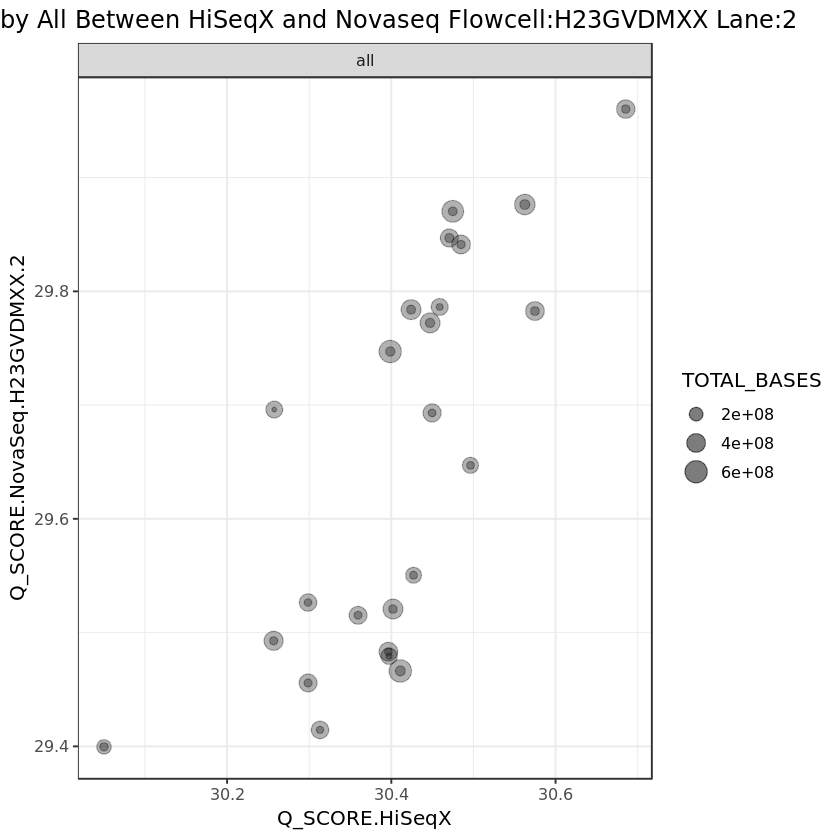

[1]  


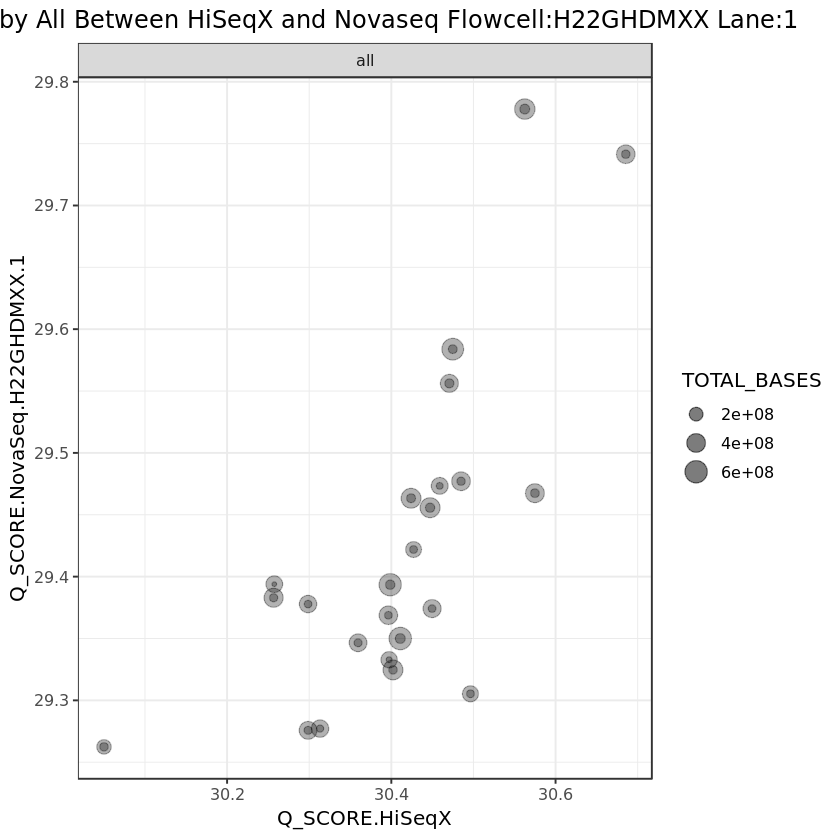

[1]  


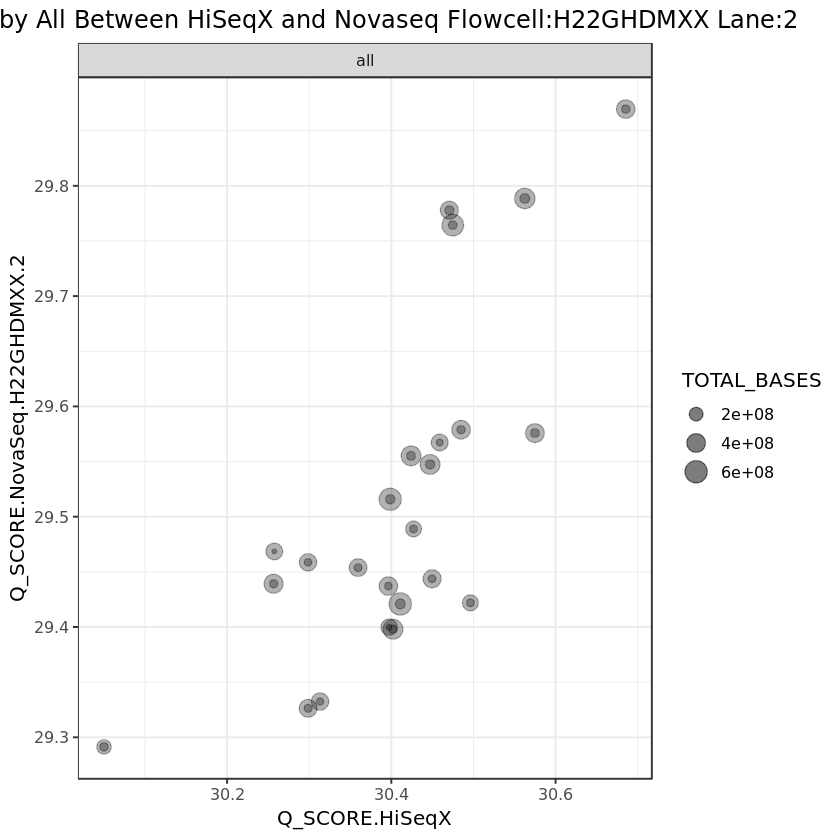

[1]  


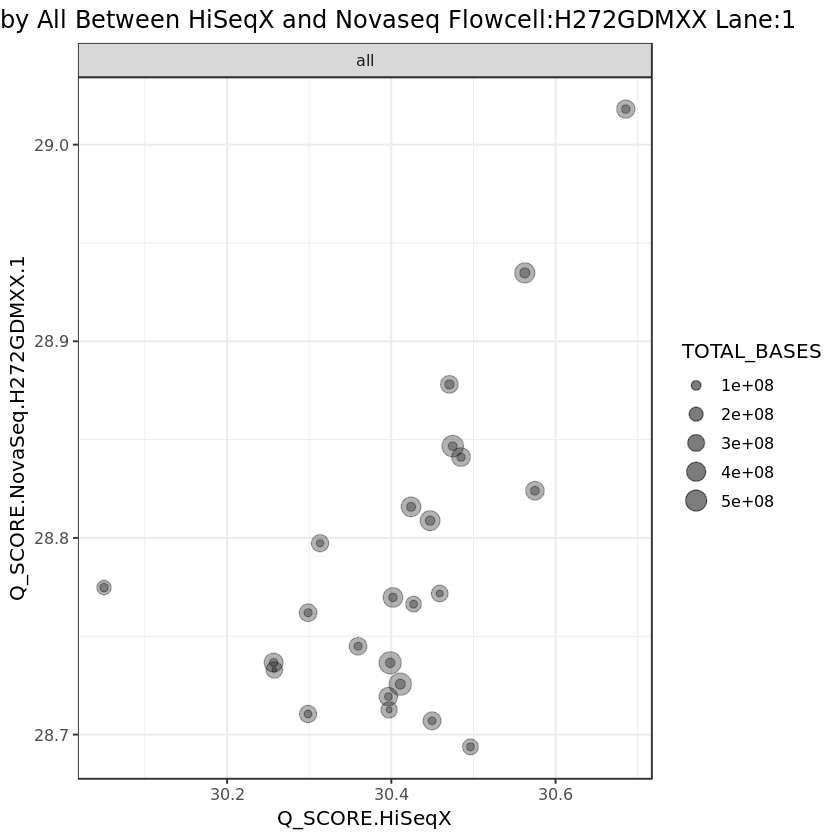

[1]  


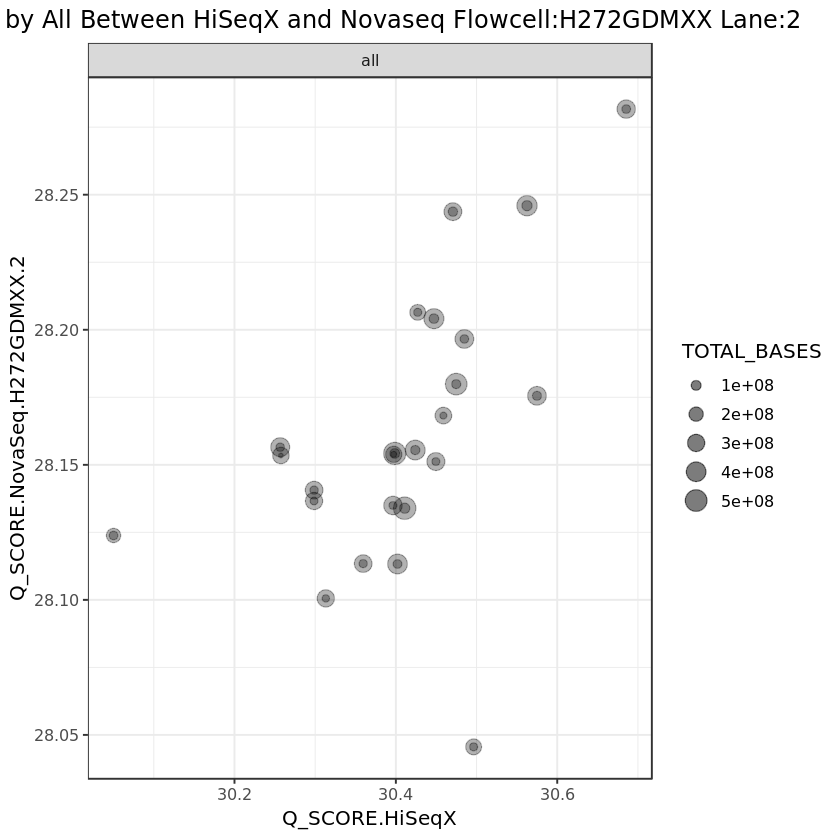

In [13]:
plots = readAndPlotError("*.chr20.*\\.error_by_all", "Error by All")
for(i in 1:length(plots)){
  print(plots[[i]])
  print(" ",quote=F)
}
  

[1]  


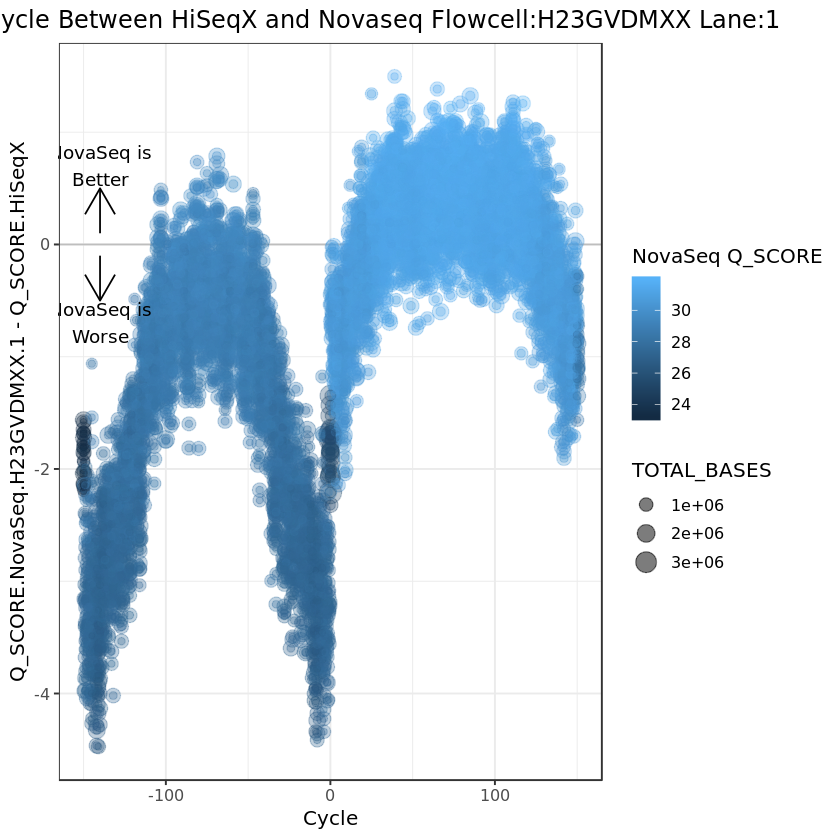

[1]  


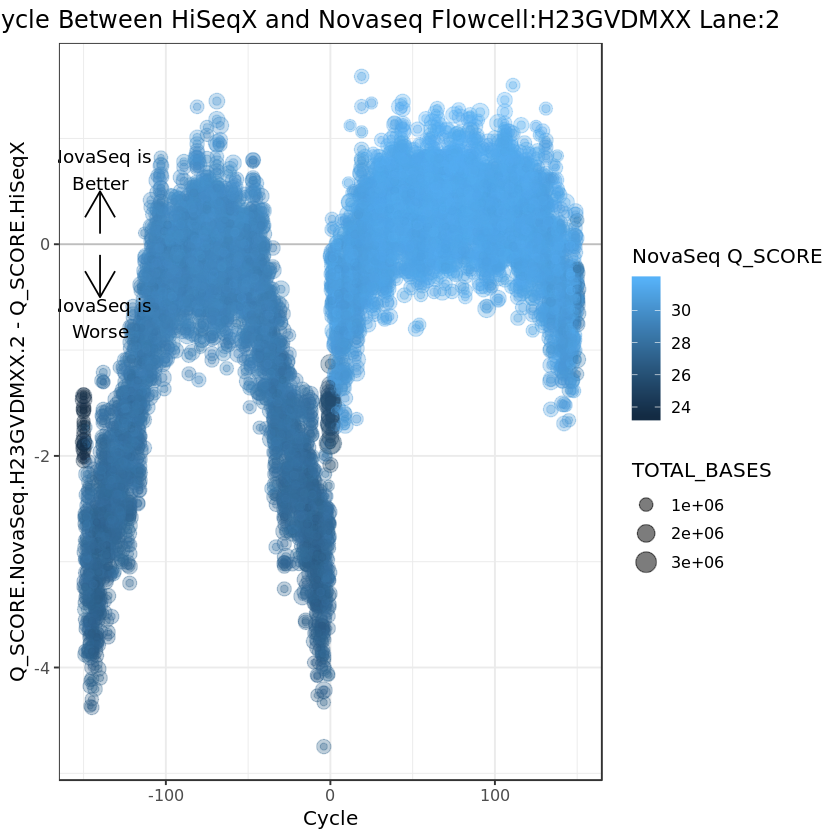

[1]  


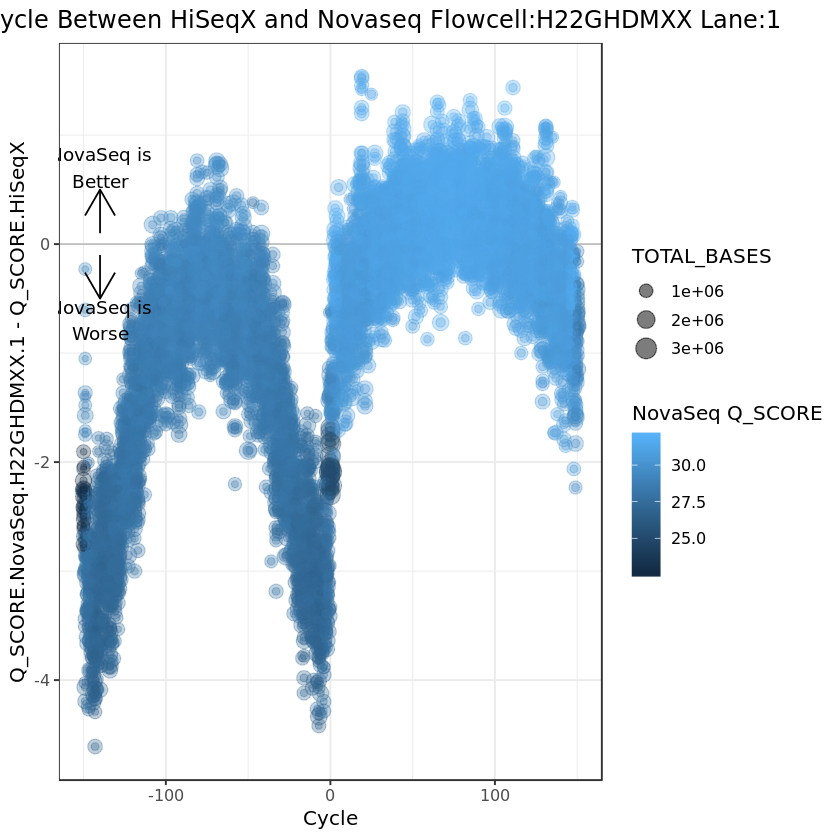

[1]  


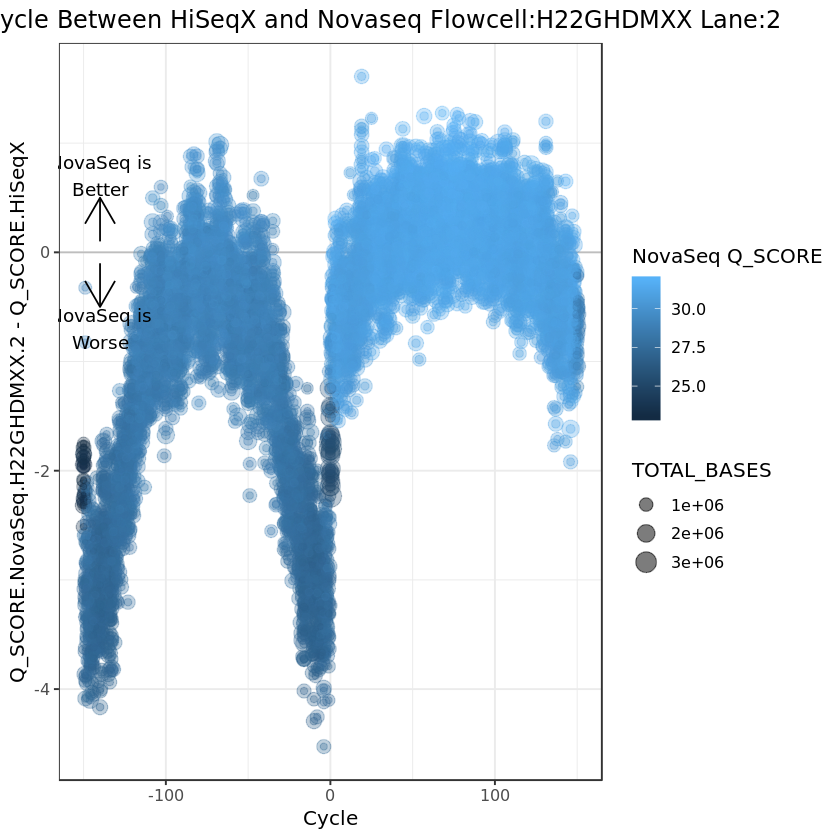

[1]  


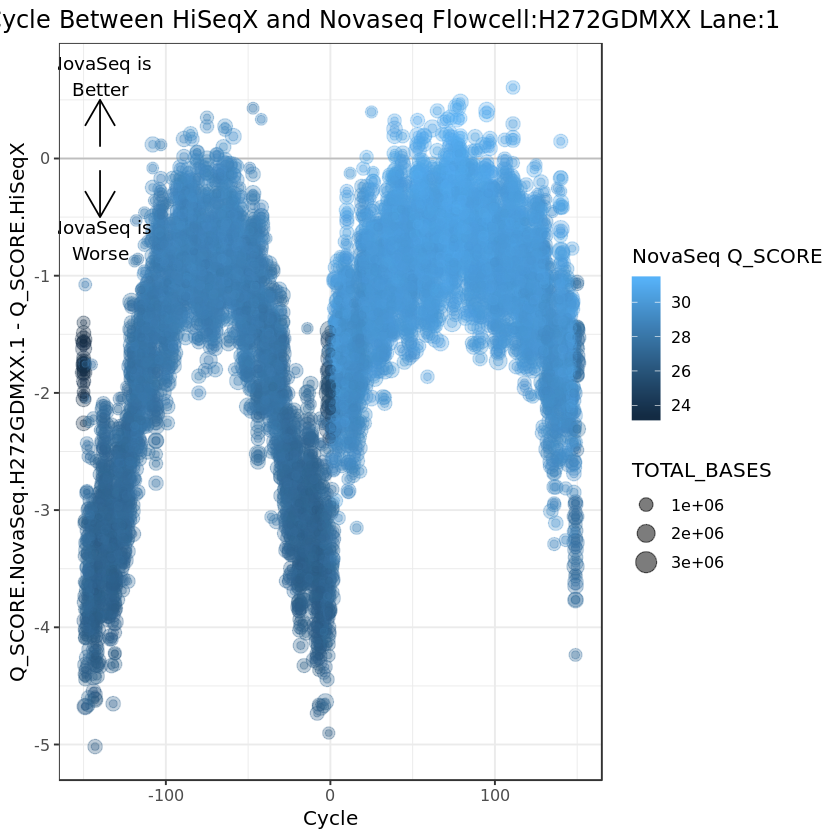

[1]  


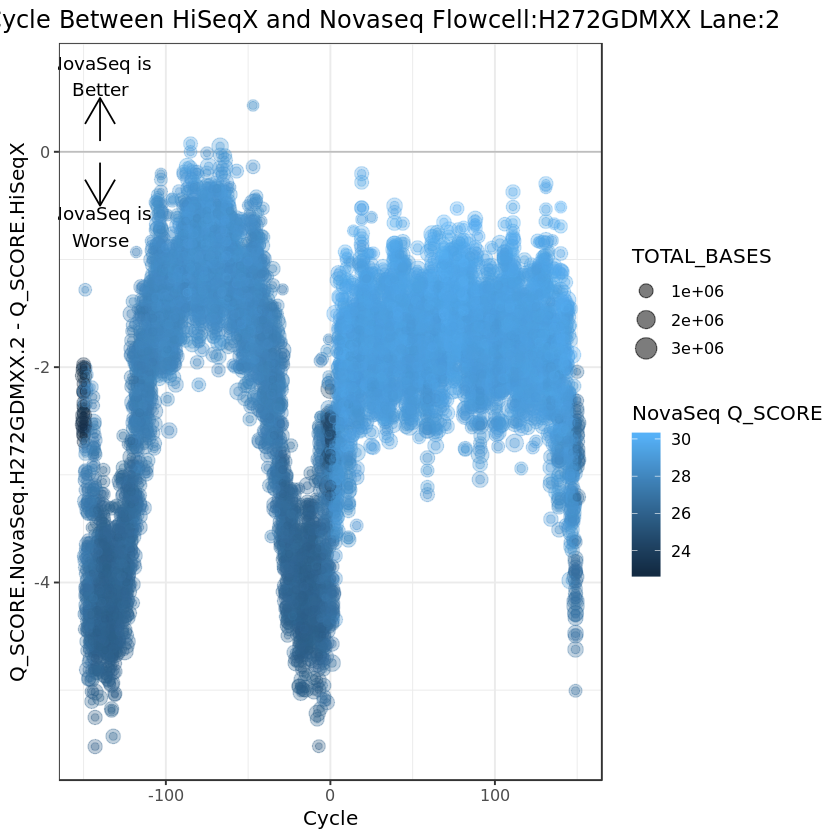

In [18]:
plots = readAndPlotErrorContinuousCovariate(".*chr20.*\\.error_by_cycle", "Error by Cycle", "Cycle", -140, .1, .5, .7)
for(i in 1:length(plots)){
  print(plots[[i]])
  print(" ",quote=F)
}

[1]  


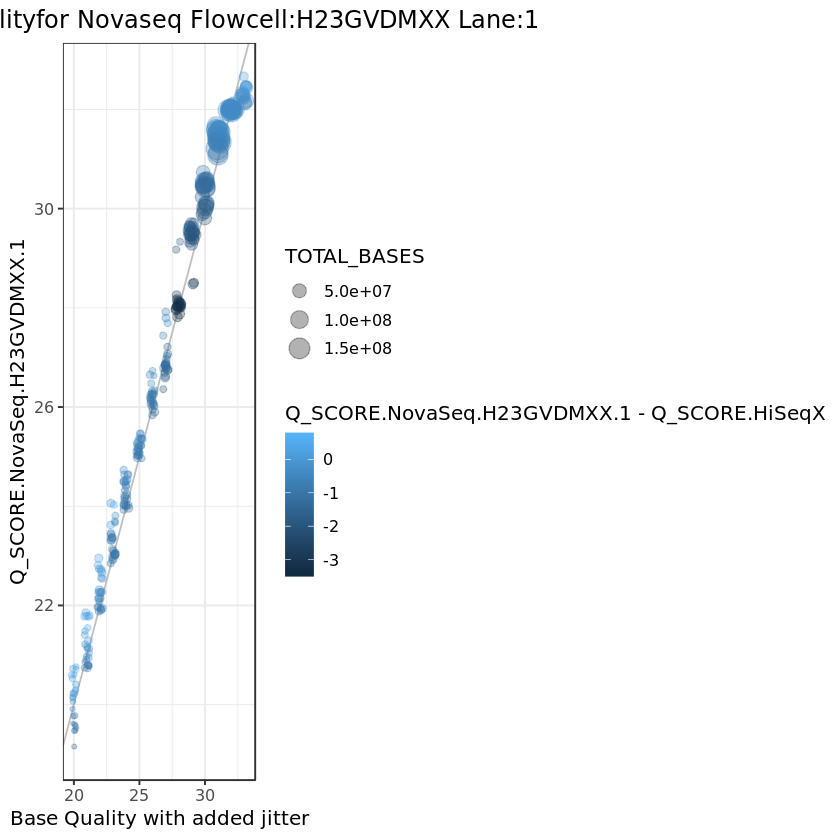

[1]  


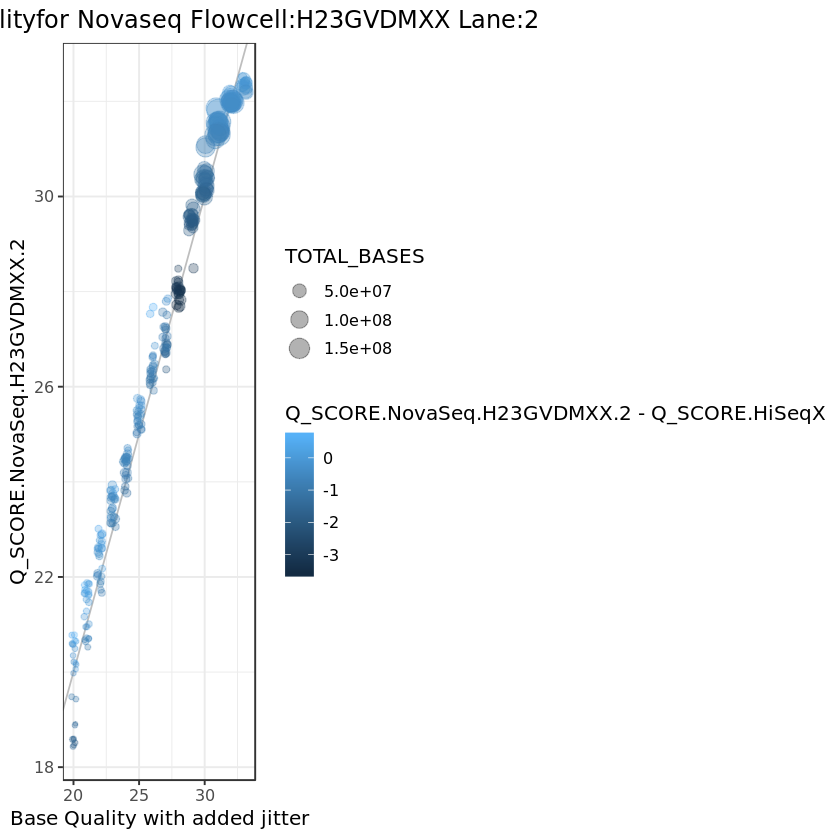

[1]  


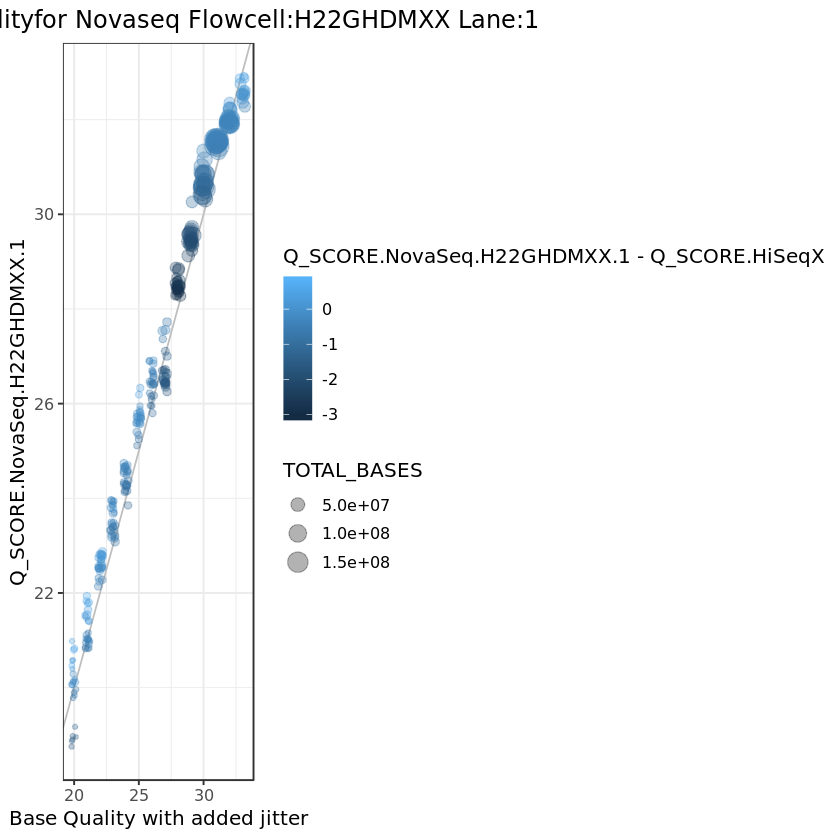

[1]  


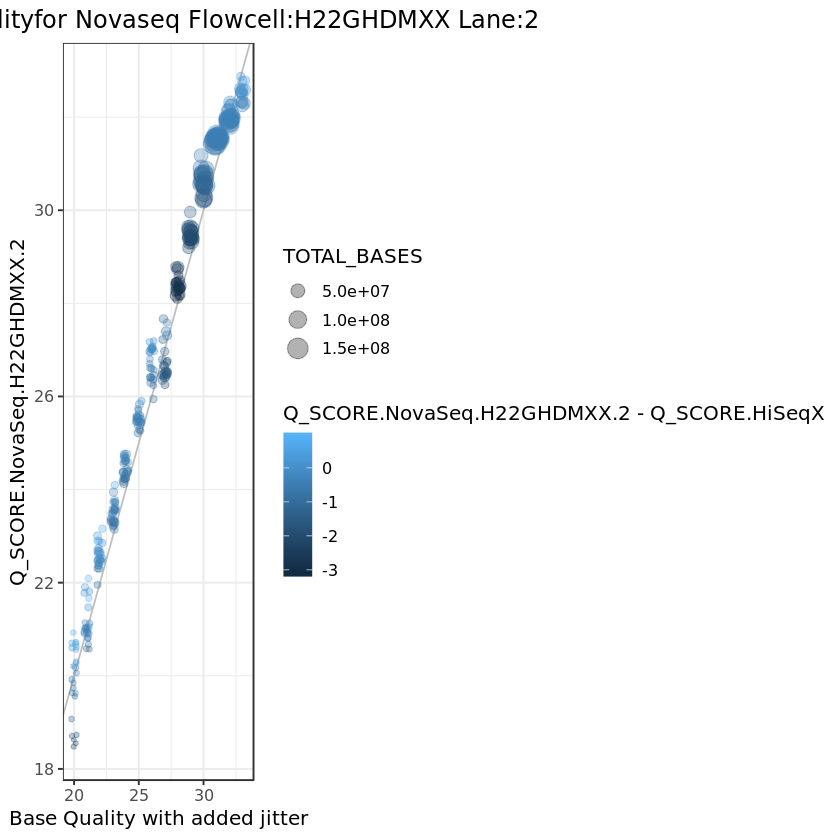

[1]  


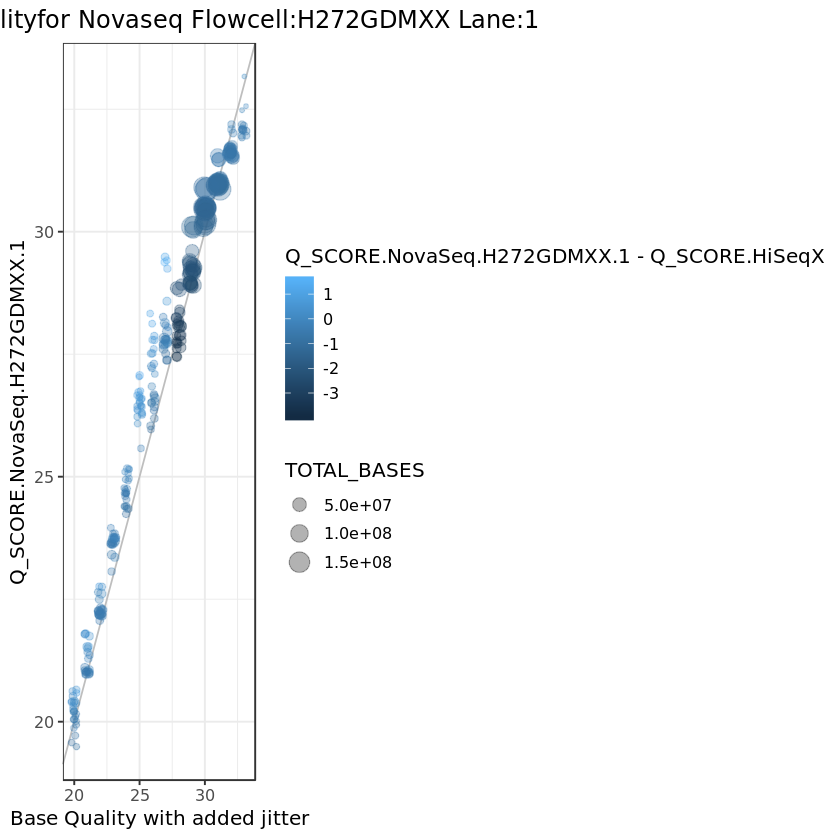

[1]  


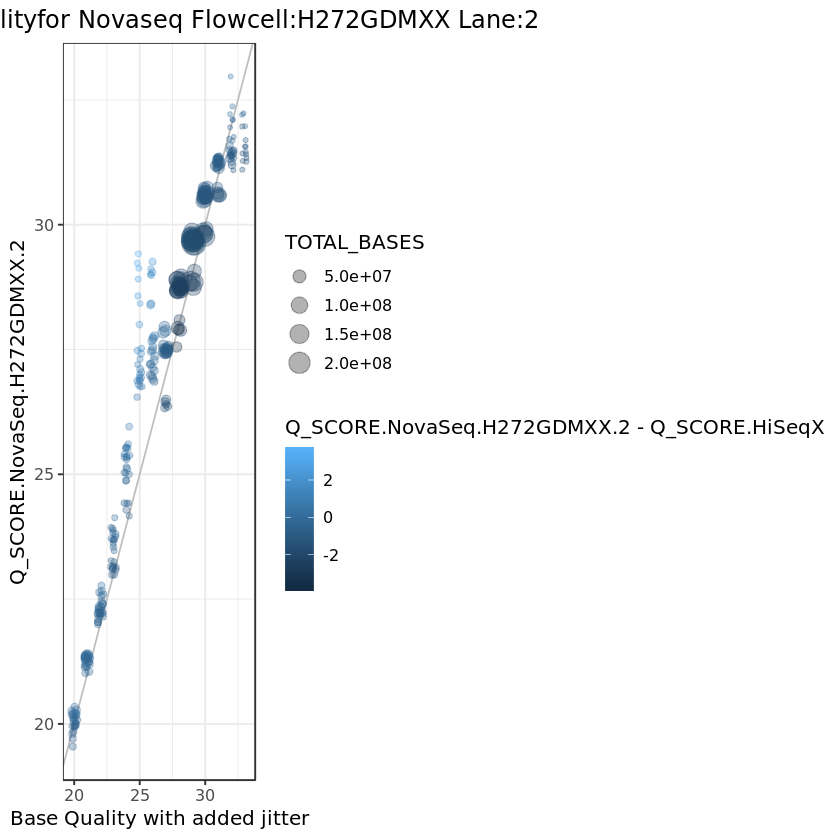

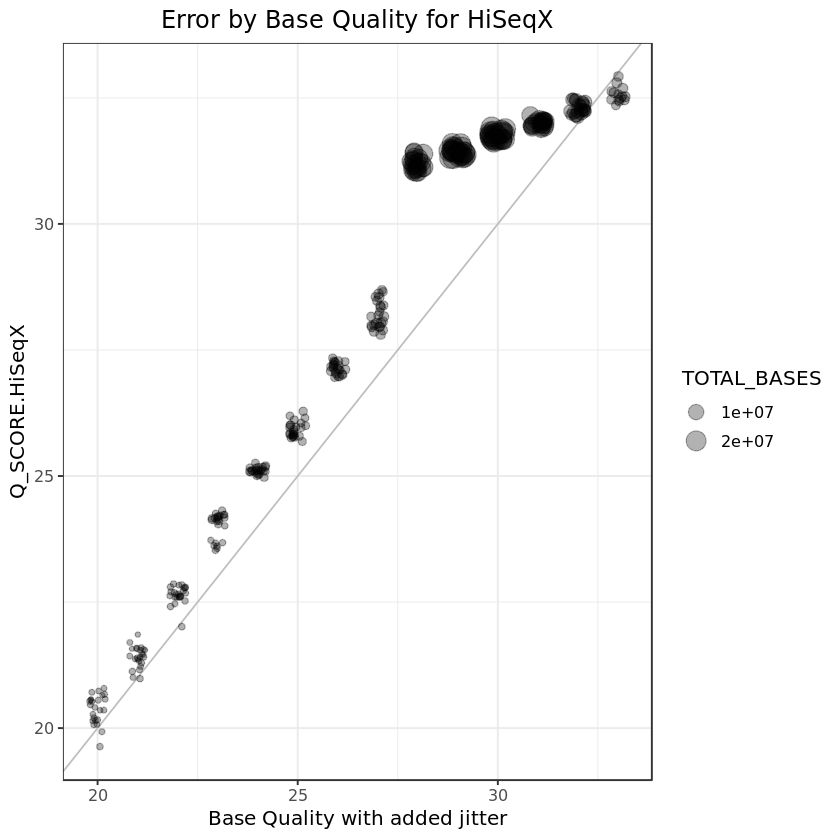

In [19]:
df.merged = readData(".*chr20.*\\.error_by_base_quality")
plots = list()
i = 1
for(flowcell in novaseq_flowcells){
  for(lane in novaseq_lanes){
    nova_suffix = paste(flowcell, lane, sep=".")
    plots[[i]] = ggplot(df.merged, aes_string(x="COVARIATE", y=paste("Q_SCORE.NovaSeq", nova_suffix, sep="."), 
                                        color=paste(paste("Q_SCORE.NovaSeq", nova_suffix, sep="."), "-Q_SCORE.HiSeqX", sep=""),
                                        size=paste("TOTAL_BASES.NovaSeq", nova_suffix, sep="."))) + 
                    geom_abline(slope = 1, intercept = 0, color="grey") + plotSetting + geom_point(alpha=alpha, position = position_jitter(width = .2, height = 0)) +
                    labs(title=paste("Error by Base Quality", "for Novaseq Flowcell:", flowcell, " Lane:", lane, sep=""), 
                      x="Base Quality with added jitter", size="TOTAL_BASES")
    i = i + 1
  }
}
for(i in 1:length(plots)){
  print(plots[[i]])
  print(" ",quote=F)
}
ggplot(df.merged, aes_string(x="COVARIATE", y="Q_SCORE.HiSeqX", size="TOTAL_BASES.HiSeqX")) + 
                    geom_abline(slope = 1, intercept = 0, color="grey") + plotSetting + geom_point(alpha=alpha, position = position_jitter(width = .2, height = 0)) +
                    labs(title="Error by Base Quality for HiSeqX", x="Base Quality with added jitter", size="TOTAL_BASES")


Warning message:
“Removed 519 rows containing missing values (geom_point).”Warning message:
“Removed 519 rows containing missing values (geom_point).”

[1]  


Warning message:
“Removed 507 rows containing missing values (geom_point).”Warning message:
“Removed 507 rows containing missing values (geom_point).”

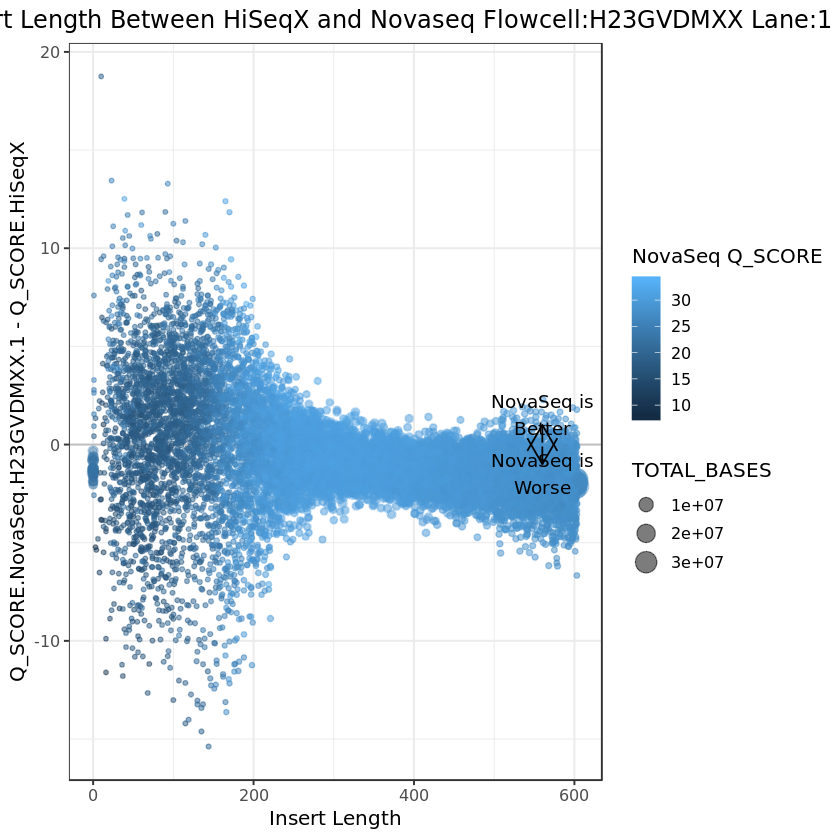

[1]  


Warning message:
“Removed 512 rows containing missing values (geom_point).”Warning message:
“Removed 512 rows containing missing values (geom_point).”

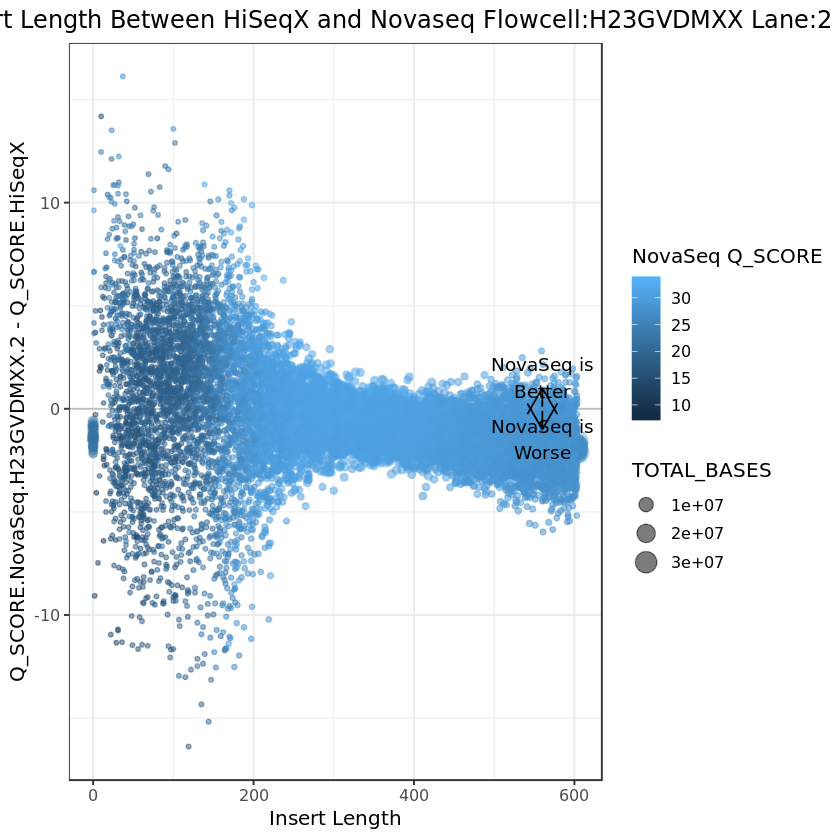

[1]  


Warning message:
“Removed 517 rows containing missing values (geom_point).”Warning message:
“Removed 517 rows containing missing values (geom_point).”

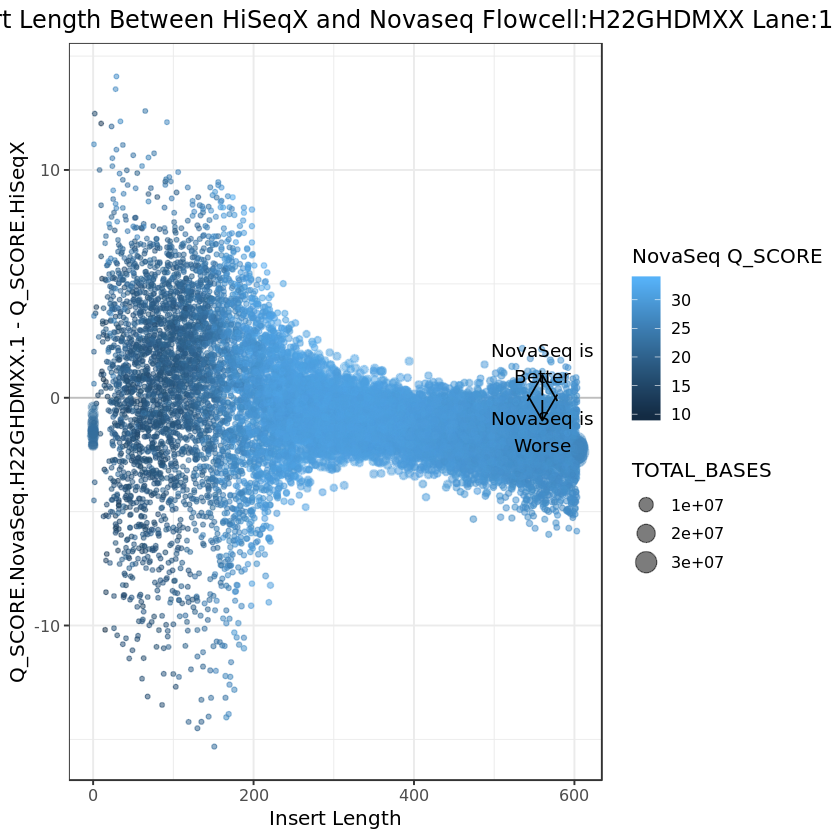

[1]  


Warning message:
“Removed 523 rows containing missing values (geom_point).”Warning message:
“Removed 523 rows containing missing values (geom_point).”

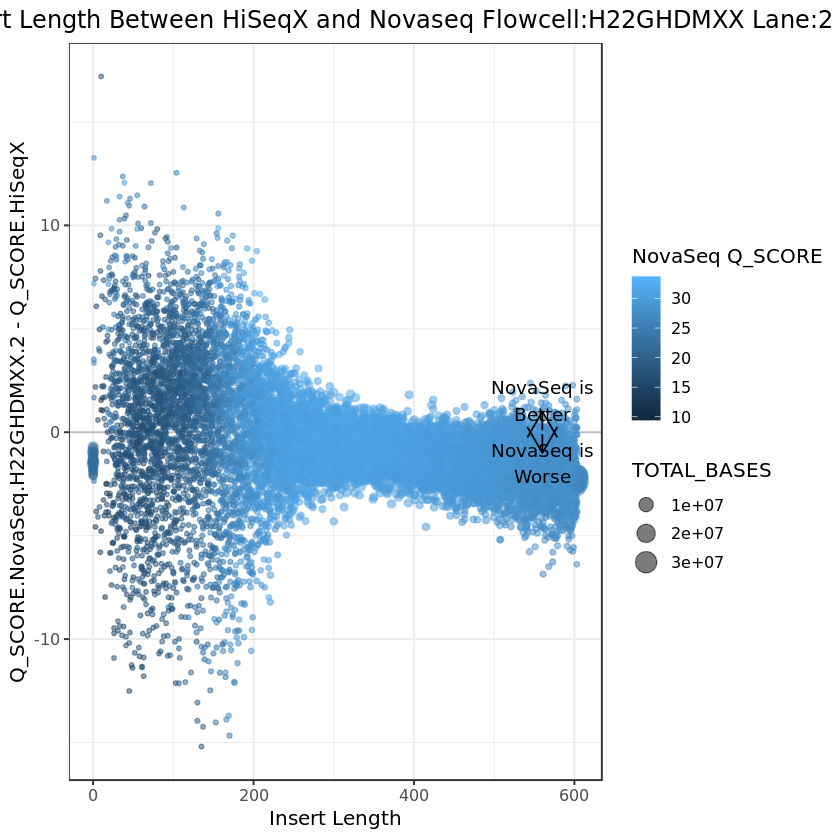

[1]  


Warning message:
“Removed 512 rows containing missing values (geom_point).”Warning message:
“Removed 512 rows containing missing values (geom_point).”

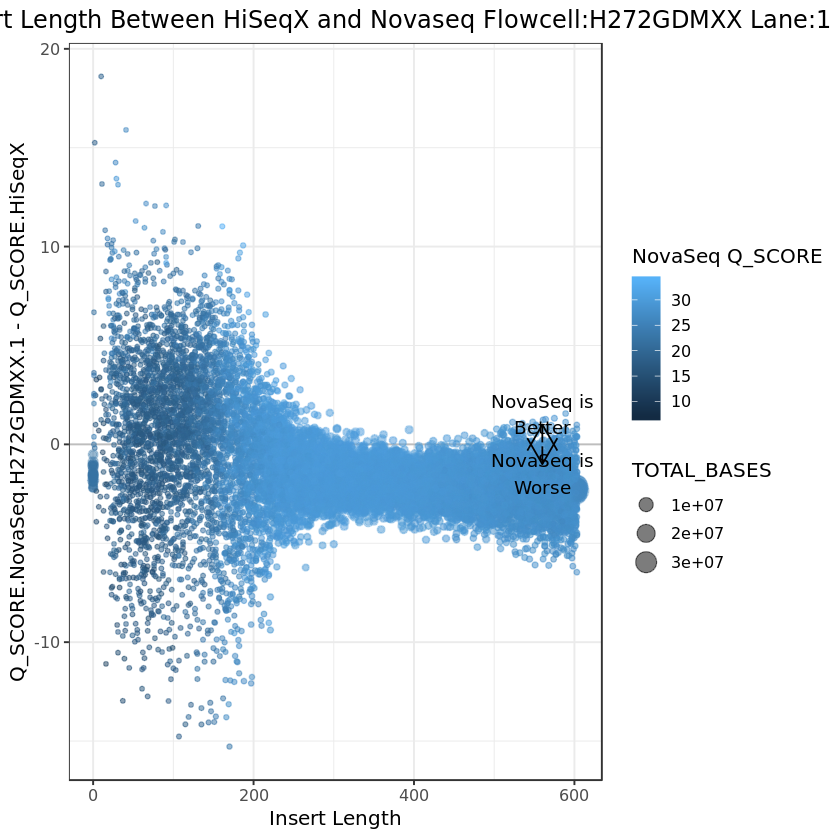

[1]  


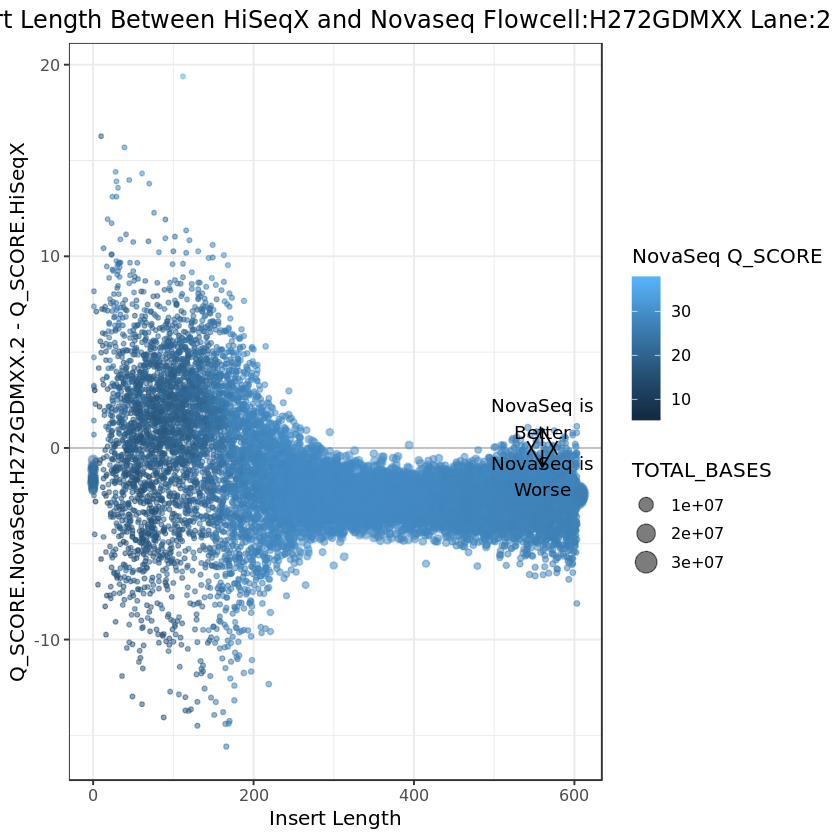

In [33]:
plots = readAndPlotErrorContinuousCovariate(".*chr20.*\\.error_by_insert_length", "Error by Insert Length", "Insert Length", 560, .1, 1, 1.5)
for(i in 1:length(plots)){
  print(plots[[i]])
  print(" ",quote=F)
}


# Error Rates on NovaSeq vs HiSeqX Using the same Libraries

## Analysis Goals

We have 24 libraries of NA12878 that have been sequenced once each on the HiSeqX and 6 times each on the NovaSeq. We want to know how the error rates compare for different variables on the NovaSeq vs the HiSeqX.

## Data and Definitions

The HiSeqX data was all sequenced in one lane of one run. The data can be found here: `/seq/picard_aggregation/D5594`. There are 24 separate Solexa libraries in that directory.

The NovaSeq data was sequenced in three runs of the NovaSeq, each run using both lanes. The three runs are in the following three directories (separated by lane and library):

Sequencer | Flowcell | Directory
---|---|---
NovaSeq|H23GVDMXX|/seq/walkup/picard/H23GVDMXX/C1-318_2017-03-22_2017-06-20
NovaSeq|H22GHDMXX|/seq/walkup/picard/H22GHDMXX/C1-318_2017-03-24_2017-06-20
NovaSeq|H272GDMXX|/seq/walkup/picard/H272GDMXX/C1-318_2017-03-24_2017-06-20

Note that the libraries are named differently, so matching the libraries was done by looking at the barcodes in the bam header. Also note that the P7 barcode is reverse complemented in the NovaSeq data.

Additionally, the data was processed using two different pipelines: Our traditional "aggregation" pipeline for the HiSeqX (although the libraries were not aggregated) and the walkup pipeline for the NovaSeq. It is assumed that there are no functional differences caused by those two different pipelines.

## Results 

There is a decrease in quality on the NovaSeq compared to the HiSeqX. Certain tiles, A's and T's, longer insert sizes, as well as the ends of reads perform worse on the NovaSeq than on the HiSeqX. This might be worth the decrease in cost, but the decrease in quality should be noted.

## Detailed Anaylsis

The following plots were selected from the total amount of data for the report, but all plots are included in the appendix.

### Read Direction

Each variable has been plotted comparing the one HiSeqX lane with the 6 NovaSeq lanes separately. Overall the plots look nearly identical across the different lanes within each NovaSeq flowcell. Additionally two of the flowcells perform almost identically: H23GVDMXX and H22GHDMXX. The third flowcell, H272GDMXX, performed worse. Each point in the plot below is a library that has been sequenced once on the HiSeqX and on one particular lane of the NovaSeq. The halos in the plots are the TOTAL_BASES that were evaluated for each covariate (the denominator of the error rate). The larger halo is the TOTAL_BASES for the NovaSeq or HiSeqX, whichever was larger, while the smaller point in the center represents the TOTAL_BASES that was smaller between the two. Here we see the error rate over the entire NIST high confidence region (after excluding known NA12878 variation, from NIST) for NovaSeq flowcell H22GHDMXX lane 1 drops from around 34 to around 32:

![](figure/error_all-3.png)

And the same plot for flowcell H272GDMXX lane 2 now drops to around 30:

![](figure/error_all-6.png)

It is difficult to see a pattern here since we're aggregating over so many conditions. From these plots all we can see is that overall the HiSeqX has slightly better quality than the NovaSeq. We see a very similar pattern when split by read direction, meaning that read direction performs similarly on the HiSeqX and the NovaSeq.

![](figure/error_direction-3.png)

![](figure/error_direction-6.png)

### Read Ordinality

However other variables do make more of a difference on the NovaSeq compared to the HiSeqX. Looking at cycle shows that read 2 under performs more on the NovaSeq than it does on the HiSeqX (although it under performs compared to read 1 on both sequencers), especially on flowcells H23GVDMXX and H22GHDMXX. The ends of the reads also under perform more on the NovaSeq. For these plots the difference in Q-score between NovaSeq and HiSeqX is shown on the y-axis, so those points above the line are better in the NovaSeq than the HiSeqX.

![](figure/error_cycle-2.png)

![](figure/error_cycle-5.png)

It is even clearer that read ordinality is an important feature when looking at the data only stratified by that covariate, rather than the cycle. 

![](figure/error_ordinality-2.png)

![](figure/error_ordinality-5.png)

### Base Quality

Here we see the Base Quality on the x-axis with the NovaSeq error rate (as a Q-score) on the y-axis. Flowcells H23GVDMXX and H22GHDMXX fall very close to the line.

![](figure/error_bq-3.png)

However flowcell H272GDMXX has a slightly different pattern.

![](figure/error_bq-6.png)

For comparison, the HiSeqX does not fall on the line when compared to base quality, but instead lies above it. This could be because the BQSR model is trained over the entire genome, however here we are only looking over the NIST high confidence region which cuts out low complexity and difficult locations. Perhaps the kink in the curve is due to original base quality binning on the HiSeqX which might not be the same on the NovaSeq. Another potential explanation could be that we are using different VCFs to exclude variant sites. The empirical values exclude NA12878 using NIST while BQSR typically uses DBSNP.

![](figure/error_bq-7.png)

A similar pattern is seen when looking at the aggregated snapshot NA12878 from production about a year ago.

```{r, shapshotBQSR}
df = readMetricsFile("SnapshotNA12878.HiConf.TenMilReads.error_metrics.error_by_base_quality", nrows=-1)
df$Q_SCORE = -10*log10(df$ERROR_BASES/df$TOTAL_BASES)
df$Q_SCORE = ifelse(df$Q_SCORE > 100, NA, df$Q_SCORE)
  
ggplot(df, aes_string(x="COVARIATE", y="Q_SCORE", size="TOTAL_BASES")) + 
  geom_abline(slope = 1, intercept = 0, color="grey") + plotSetting + geom_point(alpha=.5) +
  labs(title="Error by Base Quality for PCR-Free Snapshot", x="Base Quality in BAM", y="Empirical Q_SCORE")
```

### Insert Size

Insert size is an example of a variable that performs slightly worse on the NovaSeq than on the HiSeqX, and this difference increases with size of the insert. For this variable all 6 lanes of the NovaSeq look very similar.

![](figure/error_insert-3.png)

### GC Bias

Bases with higher GC content perform better on the HiSeqX than the NovaSeq.

![](figure/error_gc-3.png)

Interestingly, when looking over a single reference base we don't see higher error rates in C's on the NovaSeq and we only see a difference between HiSeqX and NovaSeq when the reference is A or T and more slightly if it's a G.

![](figure/error_ref-3.png)

### Tile

We see an interesting pattern when stratifying the error rates by tile. The pattern also differs across the different flowcells. H23GVDMXX and H22GHDMXX show a similar pattern where tiles on surface 1 perform better on the NovaSeq and the HiSeqX and tiles on surface 2 perform better on the HiSeqX than the NovaSeq.

![](figure/error_tile-3.png)

However, the pattern is different for flowcell H272GDMXX even between the two lanes. We can see that column 2 did not perform as well on this flowcell on the NovaSeq on either surface.

![](figure/error_tile-5.png)

On lane 2 there was even a separation based on row in addition to the differences between the columns and surfaces.

![](figure/error_tile-6.png)

### Overlapping Bases

When an insert is shorter than 300 bases, the two reads will overlap. This provides an opportunity to see if the errors in these overlaps are the same base but they mismatch the reference, or if only one of them mismatches the reference. If the two overlapping bases are the same but they are both different from the reference, we know this is an error that occurred during PCR, before the molecule was placed on the sequencer. If only one of the overlapping bases mismatches the reference then we know this is a sequencing error. For the following plots we expect the PCR errors to look very similar between the HiSeqX and the NovaSeq because the libraries are the same. However, we will be able to see differences in the two sequencers by looking at the bases that only have one mismatch to the reference.

Note that in the plots DISAGREES_WITH_MATE_Q are the bases that disagree with each other, so we presume they are sequencing errors and DISAGREES_WITH_REFERENCE_Q are bases that disagree with the reference but agree with each other so they are the PCR errors.

![](figure/overlap_all-3.png)

This difference is probably most striking when coloring by cycle since the cycle should have no bearing on PCR errors, and should only show a pattern in the Sequencing errors. Here the sequencer errors (on the left side of the plot) show more clustering than the PCR errors (the right side of the plot), however there does seem to be some pattern for the PCR errors as well. This is most likely due to the fact that we can only collect data where we have overlap, so we have more data at the ends of the reads allowing for higher Q-Scores.

![](figure/overlap_cycle-3.png)

Here we see the sequencing errors in red for each type of error. Some errors occur less frequently on the NovaSeq than the HiSeqX such as A->G, C->G, C->T, T->C, and G->A. While other errors occur more frequently on the HiSeqX than the NovaSeq.

![](figure/overlap_ref_read-3.png)


Cell below is code on how to install biostrings according to original by Megan Shand:

#Code to install Biostrings:
#source("http://bioconductor.org/biocLite.R")
#biocLite("Biostrings")



In [ ]:
## Mirrors: uncomment the following and change to your favorite CRAN mirror
## if you don't want to use the default (cran.rstudio.com).
## options("repos" = c(CRAN="https://cran.rstudio.com"))

## Mirrors: uncomment the following and change to your favorite Bioconductor
## mirror, if you don't want to use the default (bioconductor.org)
## options("BioC_mirror" = "https://bioconductor.org")

local({

    vers <- getRversion()
    biocVers <- tryCatch({
        BiocInstaller::biocVersion() # recent BiocInstaller
    }, error=function(...) {         # no / older BiocInstaller
        BioC_version_associated_with_R_version <-
            get(".BioC_version_associated_with_R_version",
                envir=asNamespace("tools"), inherits=FALSE)
        if (is.function(BioC_version_associated_with_R_version))
            BioC_version_associated_with_R_version()
        else                            # numeric_version
            BioC_version_associated_with_R_version
    })

    if (vers < "3.0") {
        ## legacy; no need to change "3.0" ever
        ## coordinate this message with .onAttach
        txt <- strwrap("A new version of Bioconductor is available
            after installing the most recent version of R; see
            http://bioconductor.org/install", exdent=2)
        message(paste(txt, collapse="\n"))
    } else if ("package:BiocInstaller" %in% search()) {
        ## messages even if already attached
        tryCatch(BiocInstaller:::.onAttach(), error=function(...) NULL)
    }

    if (vers > "2.13" && biocVers > "2.8") {

        if (exists("biocLite", .GlobalEnv, inherits=FALSE)) {
            txt <- strwrap("There is an outdated biocLite() function in the
                global environment; run 'rm(biocLite)' and try again.")
            stop("\n", paste(txt, collapse="\n"))
        }

        if (!suppressWarnings(require("BiocInstaller", quietly=TRUE))) {
            a <- NULL
            p <- file.path(Sys.getenv("HOME"), ".R", "repositories")
            if (file.exists(p)) {
                a <- tools:::.read_repositories(p)
                if (!"BioCsoft" %in% rownames(a)) 
                    a <- NULL
            }
            if (is.null(a)) {
                p <- file.path(R.home("etc"), "repositories")
                a <- tools:::.read_repositories(p)
            }
            if (!"package:utils" %in% search()) {
                path <- "//bioconductor.org/biocLite.R"
                txt <- sprintf("use 'source(\"https:%s\")' or
                    'source(\"http:%s\")' to update 'BiocInstaller' after
                    library(\"utils\")", path, path)
                message(paste(strwrap(txt), collapse="\n  "))
            } else {
                if (vers >= "3.2.2" && vers < "3.3.0") {
                    ## transitioning to https support; check availability
                    con <- file(fl <- tempfile(), "w")
                    sink(con, type="message")
                    tryCatch({
                        xx <- close(file("https://bioconductor.org"))
                    }, error=function(e) {
                        message(conditionMessage(e))
                    })
                    sink(type="message")
                    close(con)
                    if (!length(readLines(fl)))
                        a["BioCsoft", "URL"] <-
                            sub("^http:", "https:", a["BioCsoft", "URL"])
                }
                ## add a conditional for Bioc releases occuring WITHIN
                ## a single R minor version. This is so that a user with a
                ## version of R (whose etc/repositories file references the
                ## no-longer-latest URL) and without BiocInstaller
                ## will be pointed to the most recent repository suitable
                ## for their version of R
                if (vers >= "3.5.0") {
                    a["BioCsoft", "URL"] <- sub(as.character(biocVers), "3.7",
                      a["BioCsoft", "URL"])
                } else if (vers >= "3.4.0") {
                    a["BioCsoft", "URL"] <- sub(as.character(biocVers), "3.6",
                      a["BioCsoft", "URL"]) 
                } else if (vers >= "3.3.0") {
                    a["BioCsoft", "URL"] <- sub(as.character(biocVers), "3.4",
                      a["BioCsoft", "URL"]) 
                } else if (vers >= "3.2") {
                    a["BioCsoft", "URL"] <- sub(as.character(biocVers), "3.2",
                      a["BioCsoft", "URL"])
                } else if (vers == "3.1.1") {
                    ## R-3.1.1's etc/repositories file at the time of the release 
                    ## of Bioc 3.0 pointed to the 2.14 repository, but we want 
                    ## new installations to access the 3.0 repository
                    a["BioCsoft", "URL"] <- sub(as.character(biocVers), "3.0",
                      a["BioCsoft", "URL"])
                } else if (vers == "3.1.0") {
                    ## R-devel points to 2.14 repository
                    a["BioCsoft", "URL"] <- sub(as.character(biocVers), "2.14",
                      a["BioCsoft", "URL"])
                } else if (vers >= "2.15" && vers < "2.16") {
                    a["BioCsoft", "URL"] <- sub(as.character(biocVers), "2.11",
                      a["BioCsoft", "URL"])
                    biocVers <- numeric_version("2.11")
                }
                install.packages("BiocInstaller", repos=a["BioCsoft", "URL"])
                if (!suppressWarnings(require("BiocInstaller",
                                              quietly=TRUE))) {
                    path0 <- "//bioconductor.org/packages"
                    path <- sprintf("%s/%s/bioc", path0, as.character(biocVers))
                    txt0 <- "'biocLite.R' failed to install 'BiocInstaller',
                        use 'install.packages(\"BiocInstaller\",
                        repos=\"https:%s\")' or
                        'install.packages(\"BiocInstaller\", repos=\"http:%s\")'"
                    txt <- sprintf(txt0, path, path)
                    message(paste(strwrap(txt), collapse="\n  "))
                }
            }
        } else {
             ## BiocInstaller version 1.16.0-1.18.1 do not
             ## automatically update when type=="source"; notify users
             ## when they have updated R over their old libraries
             installerVersion <- utils::packageVersion("BiocInstaller")
             test0 <- (vers > "3.1.2") &&
                 !identical(getOption("pkgType"), "source") &&
                     (installerVersion >= "1.16.0") &&
                         (installerVersion <= "1.16.4")
             if (test0) {
                 if (installerVersion < "1.16.4") {
                     txt <- "Update BiocInstaller with
                         oldPkgType=options(pkgType=\"source\");
                         biocLite(\"BiocInstaller\"); options(oldPkgType)"
                     message(paste(strwrap(txt, exdent=2), collapse="\n"))
                 }
                 if (vers >= "3.2") {
                     path <- "//bioconductor.org/biocLite.R"
                     txt <- sprintf("BiocInstaller version %s is too old for
                         R version %s; remove.packages(\"BiocInstaller\"),
                         re-start R, then source(\"https:%s\") or
                         source(\"http:%s\")", biocVers, vers, path, path)
                     warning(paste(strwrap(txt, exdent=2), collapse="\n"))
                 }
             }
         }
    } else {
        tryCatch({
            source("https://bioconductor.org/getBioC.R")
        }, error=function(e) {
            warning("https: failed (", conditionMessage(e), "), trying http",
                    immediate.=TRUE)
            source("http://bioconductor.org/getBioC.R")
        })
        biocLite <<-
            function(pkgs, groupName="lite", ...)
            {
                if (missing(pkgs))
                    biocinstall(groupName=groupName, ...)
                else
                    biocinstall(pkgs=pkgs, groupName=groupName, ...)
            }
    }
})